In [25]:
import bisect
import random
import copy
import time

In [40]:
num_elems = 10000

crowds = [ random.randint(0, 99999) for i in range(num_elems) ]
shuffled = copy.deepcopy(crowds); random.shuffle( shuffled )

for elem in shuffled:
    elem in crowds
    
crowds.sort()
for elem in shuffled:
    bisect.bisect_left( crowds, elem )
    
crowds = set( crowds )
for elem in shuffled:
    elem in crowds

In [59]:
def time_measure(num_elems):
    num_elems = int(num_elems)
    
    crowds = [ random.randint(0, num_elems*100) for i in range(num_elems) ]
    shuffled = copy.deepcopy(crowds); random.shuffle( shuffled )
    
    t0 = time.process_time()
    for elem in shuffled:
        elem in crowds
    t1 = time.process_time() - t0

    crowds.sort()
    t0 = time.process_time()
    for elem in shuffled:
        bisect.bisect_left( crowds, elem )
    t2 = time.process_time() - t0

    crowds = set( crowds )
    t0 = time.process_time()
    for elem in shuffled:
        elem in crowds
    t3 = time.process_time() - t0
    
    return num_elems, t1, t2, t3

In [147]:
time_measure(100)

(100, 5.147699999952238e-05, 5.7268999995585546e-05, 2.5870000044392327e-06)

In [63]:
times = [ time_measure( n ) for n in np.logspace(1, 4.5, 30) ]
times = np.array( times, dtype=float )

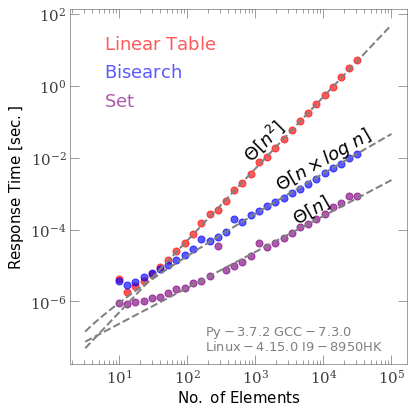

In [146]:
_, ax = m_get_figure()

xx = times[:, 0]
x = np.logspace(0.5, 5.0, 50)
y1 = x**2 * 5.0e-9
y2 = x*np.log(x) * 4.0e-8
y3 = x * 2.4e-8
y = [y1,y2,y3]

for i in range(1,4):
    #ax.plot( xx, times[:, i], c = mycms[i-1], lw = 2.5 )
    ax.scatter( xx, times[:, i], c = mycms[i-1], s=50, marker='o' )
    ax.plot( x, y[i-1], c = 'gray', lw = 2.0, ls='--' )
    
m_set_scale(ax, 'log', 'log')
txpos(ax, r'$\Theta[n^2]$', (.5, .63), 'k', 18 ,rotation=45)
txpos(ax, r'$\Theta[n\times log\ n]$', (.6, .575), 'k', 18 ,rotation=30)
txpos(ax, r'$\Theta[n]$', (.65, .4355), 'k', 18 ,rotation=30)
txposs( ax, [r'$\rm Linear\ Table$', r'$\rm Bisearch$', r'$\rm Set$'], (.1, .9), (0., -0.08), mycms, 18 )

m_set_label(ax, r'$\rm No.\ of\ Elements$', r'$\rm Response\ Time\ [sec.]$')
txpos(ax, r'$\rm Py-3.7.2\ GCC-7.3.0$', (.4, .09), 'gray', 13)
txpos(ax, r'$\rm Linux-4.15.0\ I9-8950HK$', (.4, .05), 'gray', 13)

plt.tight_layout()
plt.savefig('algorithm_search.pdf')
plt.show()
